Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2  | AY 2023-2024
<hr> | <hr>
<u>**FINAL EXAM** | **Model Deployment in the Cloud**
**Name** | Paul Gabriel Pagatpat & Katherine May Dalangan
**Section** | CPE32S5
**Date Performed**: | May 11, 2024
**Date Submitted**: | May 18, 2024
**Instructor**: | Engr. Roman M. Richard

In [2]:
import os
import glob
from IPython.display import Image as IPImage
import pandas as pd             # Pandas
import numpy as np              # NumPy
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns           # Seaborn
from PIL import Image           # Pillow

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Keras
from keras.layers import Flatten, Dense, Activation, Dropout
from keras import models, optimizers
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import DenseNet121
from keras.applications.densenet import DenseNet121, preprocess_input

# scikit-learn
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
train_data = '/content/drive/MyDrive/CPE019-FinalProject'

In [5]:
pd.DataFrame(
    os.listdir(train_data),
    columns=['File Name']
)

,File Name
0,sunrise
1,cloudy
2,rain
3,shine
4,nn_architecture.png


# **Directory Paths Containing Training Data**

In [6]:
train_files = [i for i in glob.glob(train_data + "/*/*")]
np.random.shuffle(train_files)
labels = [os.path.dirname(i).split("/")[-1] for i in train_files]
data = zip(train_files, labels)
training_data = pd.DataFrame(data, columns=["Path", "Label"])
training_data

,Path,Label
0,/content/drive/MyDrive/CPE019-FinalProject/clo...,cloudy
1,/content/drive/MyDrive/CPE019-FinalProject/sun...,sunrise
2,/content/drive/MyDrive/CPE019-FinalProject/shi...,shine
3,/content/drive/MyDrive/CPE019-FinalProject/sun...,sunrise
4,/content/drive/MyDrive/CPE019-FinalProject/rai...,rain
...,...,...
1120,/content/drive/MyDrive/CPE019-FinalProject/clo...,cloudy
1121,/content/drive/MyDrive/CPE019-FinalProject/rai...,rain
1122,/content/drive/MyDrive/CPE019-FinalProject/clo...,cloudy
1123,/content/drive/MyDrive/CPE019-FinalProject/sun...,sunrise


# **III. Data Visualization**

<ipython-input-7-c3a41f91a523>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=training_data["Label"], palette=bar_colors)
<ipython-input-7-c3a41f91a523>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=training_data["Label"], palette=bar_colors)


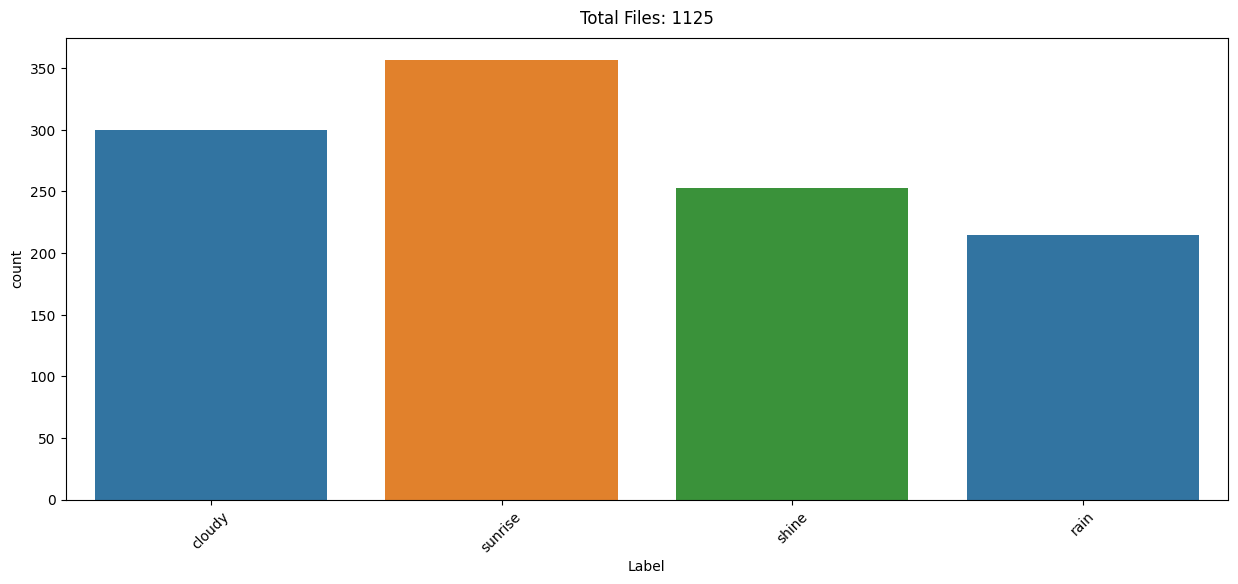

In [7]:
bar_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
plt.figure(figsize=(15, 6))
ax = sns.countplot(x=training_data["Label"], palette=bar_colors)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8,
                color='white')

plt.xticks(rotation=45)
plt.title(f'Total Files: {len(training_data)}', pad=10)
plt.show()

# **IV. Collect Data Paths & Labels from Directory Structure**

In [9]:
data_paths = []
labels = []

main_dirs = os.listdir(train_data)
for folder_name in main_dirs:
    folder_path = os.path.join(train_data, folder_name)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        data_paths.append(file_path)
        labels.append(folder_name)

# **V. Data Preprocessing**

In [24]:
batch_size = 32
image_size = (150, 150)
num_channels = 3
image_shape = (image_size[0], image_size[1], num_channels)
data_dirs = pd.Series(data_paths, name='Path')
classes = pd.Series(labels, name='Label')

In [25]:
def preprocess_image(img):
    return img
train_df, val_test_df = train_test_split(
    training_data,
    train_size=0.8,
    shuffle=True,
    random_state=123
)
val_df, test_df = train_test_split(
    val_test_df,
    train_size=0.5,
    shuffle=True,
    random_state=123
)

In [26]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,
    rescale=1.0/255
)
train_df['Label'] = train_df['Label'].astype(str)
val_df['Label'] = val_df['Label'].astype(str)

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='Path',
    y_col='Label',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='Path',
    y_col='Label',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

Found 900 validated image filenames belonging to 4 classes.
Found 112 validated image filenames belonging to 4 classes.


# **Display Class Names**

In [27]:
class_indices = train_generator.class_indices
class_indices.keys()

dict_keys(['cloudy', 'rain', 'shine', 'sunrise'])

In [28]:
labels = []
for key in class_indices.keys():
    labels.append(key)

total_labels = len(labels)

In [29]:
print("Labels: ", labels)
print("\nTotal no. of unique labels:", total_labels)

Labels:  ['cloudy', 'rain', 'shine', 'sunrise']

Total no. of unique labels: 4


# **Visualize a Subset of Images from the Training Set**

(1200, 1600, 3)
(158, 237, 3)
(168, 299, 3)
(177, 284, 3)
(159, 212, 3)
(168, 300, 3)
(166, 256, 3)
(480, 852, 3)


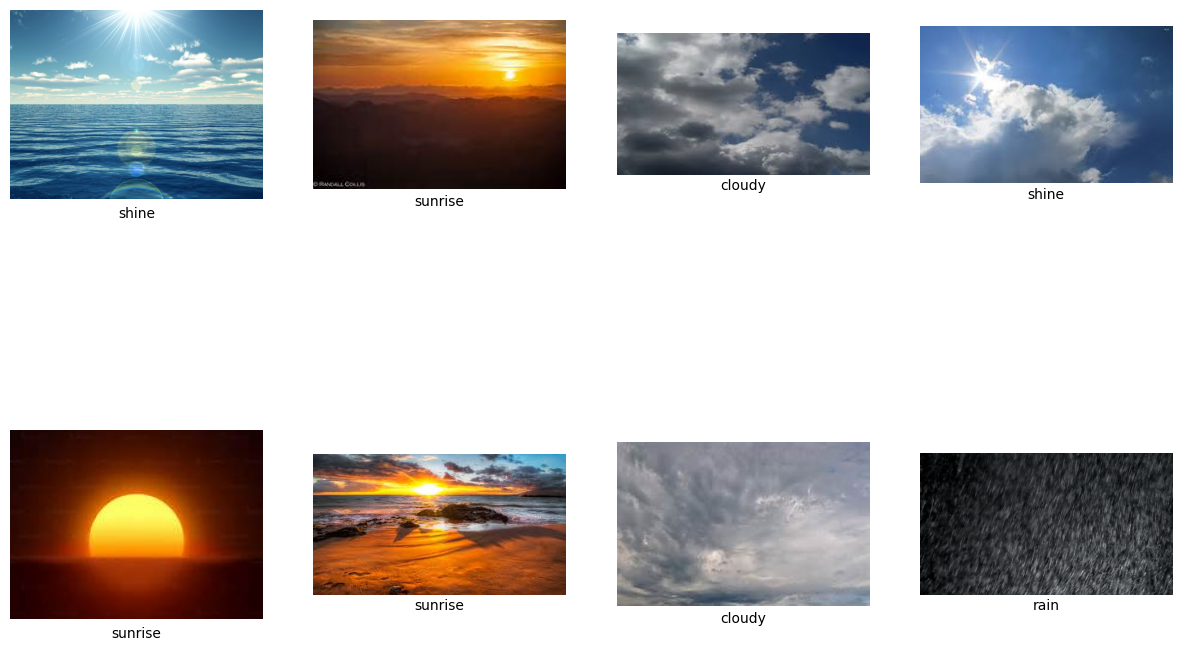

In [30]:
no_of_rows = 2
no_of_columns = 4

fig, axes = plt.subplots(no_of_rows, no_of_columns, figsize=(15, 10))

for i in range(no_of_rows):

    for j in range(no_of_columns):

        index = i * no_of_columns + j
        if index < len(training_data):
            im = Image.open(training_data.iloc[index]['Path'])
            img = np.array(im)
            print(img.shape)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            label = training_data.iloc[index]['Label']
            axes[i, j].text(0.5, -0.1, label, ha='center', transform=axes[i, j].transAxes)
plt.show()

# **VI. Build Model**

In [31]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3) ,
    classes=4
)

In [32]:
for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_5 (Dense)             (None, 1024)              16778240  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)              

# **Visualize the Neural Network Architecture**

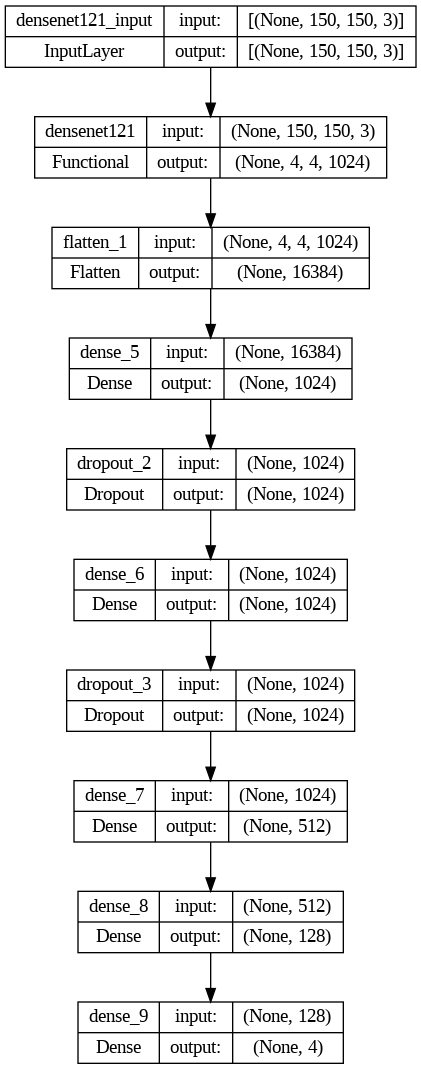

In [33]:
model_visualization_path = "/content/drive/MyDrive/CPE019-FinalProject/nn_architecture.png"
plot_model(model, to_file=model_visualization_path, show_shapes=True, show_layer_names=True)
IPImage(filename=model_visualization_path)

# **Create Model Checkpoint Callback to Save Best Model**

In [34]:
checkpoint_path = "/content/drive/MyDrive/CPE019-FinalProject/model.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# **VII. Compile Model**

In [35]:
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x=train_generator,
    validation_data=valid_generator,
    epochs=5,
    verbose=1,
    validation_steps=None,
    callbacks=[checkpoint]
)

Epoch 1/5
29/29 [==============================] - ETA: 0s - loss: 1.6396 - accuracy: 0.5644
Epoch 1: val_accuracy improved from -inf to 0.91964, saving model to /content/drive/MyDrive/CPE019-FinalProject/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 202s 7s/step - loss: 1.6396 - accuracy: 0.5644 - val_loss: 0.2916 - val_accuracy: 0.9196
Epoch 2/5
29/29 [==============================] - ETA: 0s - loss: 0.4040 - accuracy: 0.8589
Epoch 2: val_accuracy improved from 0.91964 to 0.92857, saving model to /content/drive/MyDrive/CPE019-FinalProject/model.h5
29/29 [==============================] - 102s 4s/step - loss: 0.4040 - accuracy: 0.8589 - val_loss: 0.1547 - val_accuracy: 0.9286
Epoch 3/5
29/29 [==============================] - ETA: 0s - loss: 0.2387 - accuracy: 0.9167
Epoch 3: val_accuracy improved from 0.92857 to 0.95536, saving model to /content/drive/MyDrive/CPE019-FinalProject/model.h5
29/29 [==============================] - 105s 4s/step - loss: 0.2387 - accuracy: 0.9167 - val_loss: 0.1013 - val_accuracy: 0.9554
Epoch 4/5
29/29 [==============================] - ETA: 0s - loss: 0.1690 - accuracy: 0.9411
Epoch 4: val_accuracy did not improve from 0.95536
29/29 [=========================

# **VIII. Train Model**

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[checkpoint]
)

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 0.0956 - accuracy: 0.9689
Epoch 1: val_accuracy improved from 0.95536 to 0.95833, saving model to /content/drive/MyDrive/CPE019-FinalProject/model.h5
28/28 [==============================] - 99s 3s/step - loss: 0.0956 - accuracy: 0.9689 - val_loss: 0.0622 - val_accuracy: 0.9583
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 0.0737 - accuracy: 0.9712
Epoch 2: val_accuracy improved from 0.95833 to 0.96875, saving model to /content/drive/MyDrive/CPE019-FinalProject/model.h5
28/28 [==============================] - 99s 4s/step - loss: 0.0737 - accuracy: 0.9712 - val_loss: 0.0594 - val_accuracy: 0.9688
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9793
Epoch 3: val_accuracy improved from 0.96875 to 0.97917, saving model to /content/drive/MyDrive/CPE019-FinalProject/model.h5
28/28 [==============================] - 100s 4s/step - loss: 0.0631 - accuracy: 0.9793 

# **Display Training History**

In [37]:
train_history = pd.DataFrame(history.history)
train_history['Epoch'] = range(1, len(train_history) + 1)
train_history = train_history[['Epoch', 'loss', 'accuracy', 'val_loss', 'val_accuracy']]

train_history

,Epoch,loss,accuracy,val_loss,val_accuracy
0,1,0.095599,0.968894,0.062231,0.958333
1,2,0.073659,0.971198,0.059376,0.968750
2,3,0.063146,0.979263,0.045703,0.979167
3,4,0.044229,0.985023,0.047384,0.968750
4,5,0.043556,0.981567,0.069443,0.968750
5,6,0.038265,0.988479,0.060911,0.979167
6,7,0.033509,0.989631,0.044542,0.979167
7,8,0.016913,0.991935,0.053670,0.968750
8,9,0.020729,0.993088,0.040164,0.979167
9,10,0.020680,0.994420,0.031314,0.979167


# **Evaluate Model**

In [38]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
val_loss, val_accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // valid_generator.batch_size)


3/3 [==============================] - 9s 3s/step - loss: 0.0398 - accuracy: 0.9792


In [39]:

train_accuracy_percentage = train_accuracy * 100
val_accuracy_percentage = val_accuracy * 100


In [40]:

evaluation_results = pd.DataFrame({
    'Set': ['Train', 'Validation'],
    'Loss': [train_loss, val_loss],
    'Accuracy': [f'{train_accuracy_percentage:.2f}%', f'{val_accuracy_percentage:.2f}%']
})

evaluation_results

,Set,Loss,Accuracy
0,Train,0.003178,100.00%
1,Validation,0.039829,97.92%


# **Plot Loss & Accuracy**

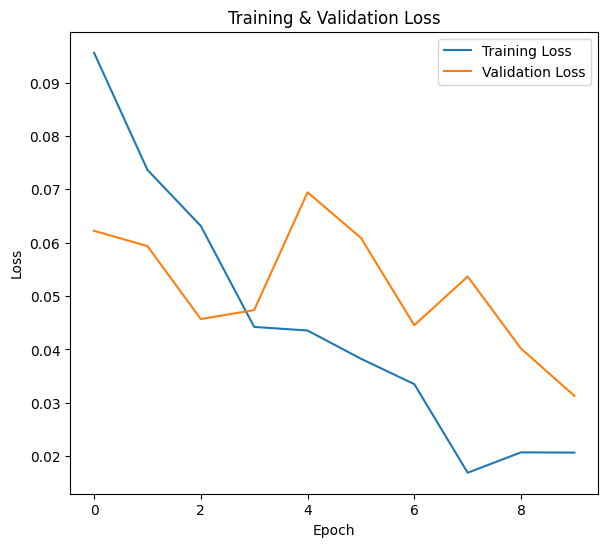

In [45]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(train_history['loss'], label='Training Loss')
plt.plot(train_history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


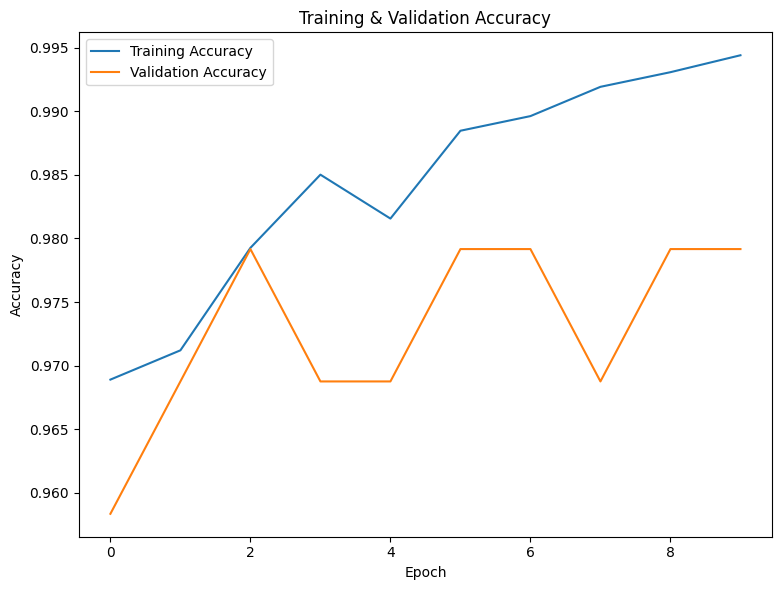

In [49]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
plt.plot(train_history['accuracy'], label='Training Accuracy')
plt.plot(train_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()